In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[28.31484552]
-1.8454171656498581


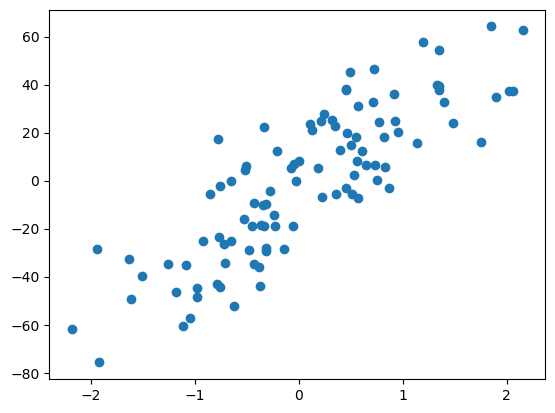

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\tesla\AppData\Local\Temp\ipykernel_17072\15920687.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+04, tolerance: 7.788e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


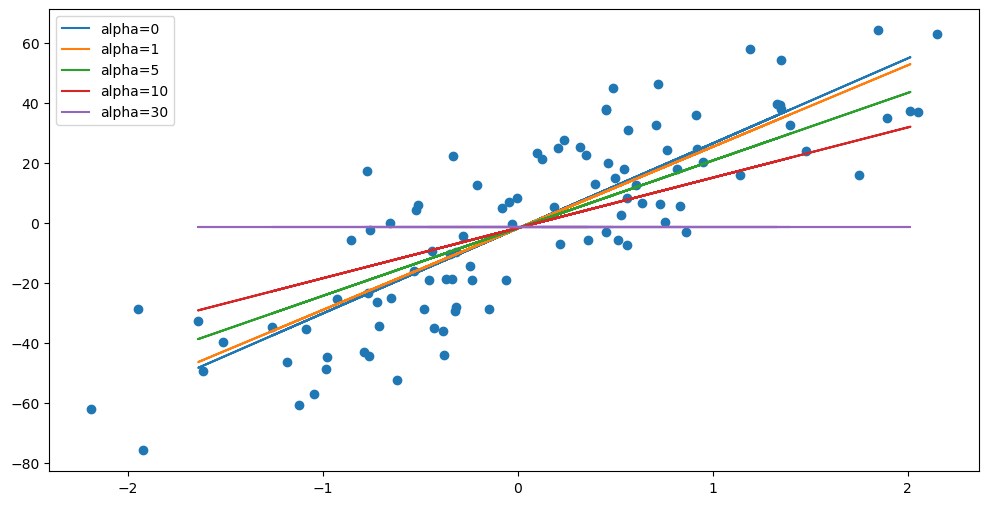

In [4]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

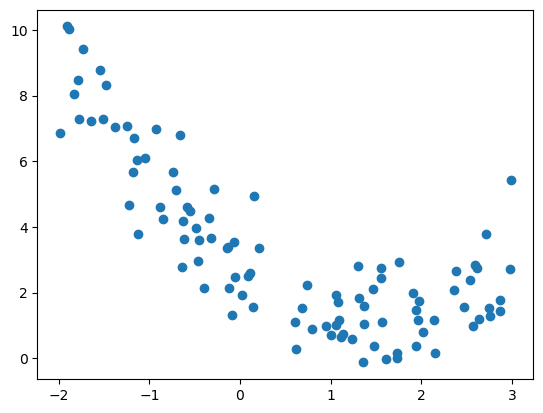

In [5]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.848e+01, tolerance: 6.352e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

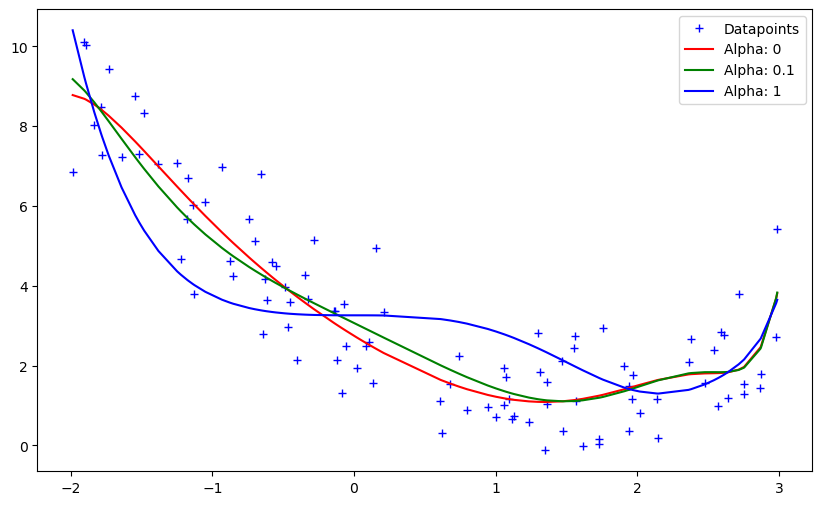

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# Define the signals
def x(t):
    return np.where(t >= -2, 1, 0) + np.where(t >= -1, t + 1, 0) - np.where(t >= 1, t - 1, 0)

def y(t):
    return (
        3 * np.where(t >= -3, 1, 0)
        - np.where(t >= -2, t + 2, 0)
        + 2 * np.where(t >= 0, t, 0)
        - 2 * np.where(t >= 2, 1, 0)
        - np.where(t >= 3, t - 3, 0)
        - 2 * np.where(t >= 4, 1, 0)
    )

# Create the GUI
def plot_signals():
    t = np.linspace(-5, 5, 1000)  # Time range from -5 to 5

    # Create a figure and axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Plot x(t)
    ax1.plot(t, x(t), label="x(t) = u(t+2) + r(t+1) - r(t-1)", color="blue")
    ax1.set_title("Signal x(t)")
    ax1.set_xlabel("Time (t)")
    ax1.set_ylabel("Amplitude")
    ax1.grid(True)
    ax1.legend()

    # Plot y(t)
    ax2.plot(t, y(t), label="y(t) = 3u(t+3) - r(t+2) + 2r(t) - 2u(t-2) - r(t-3) - 2u(t-4)", color="red")
    ax2.set_title("Signal y(t)")
    ax2.set_xlabel("Time (t)")
    ax2.set_ylabel("Amplitude")
    ax2.grid(True)
    ax2.legend()

    # Adjust layout
    plt.tight_layout()

    # Embed the plot in the Tkinter GUI
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Create the main window
root = tk.Tk()
root.title("Signal Plotter")

# Add a button to plot the signals
plot_button = tk.Button(root, text="Plot Signals", command=plot_signals)
plot_button.pack()

# Run the Tkinter event loop
root.mainloop()